In [1]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

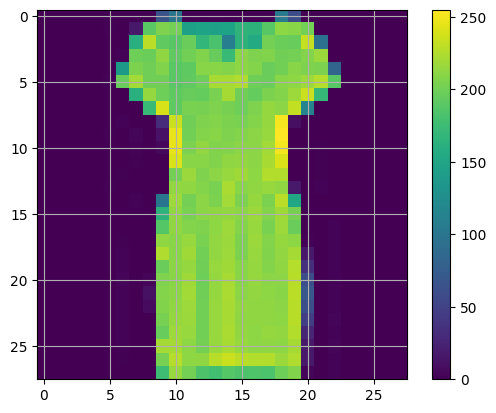

In [16]:
plt.figure()
plt.imshow(train_images[20])
plt.colorbar()
plt.grid(True)
plt.show()

In [17]:
train_images = train_images / 255.0

test_images = test_images / 255.0

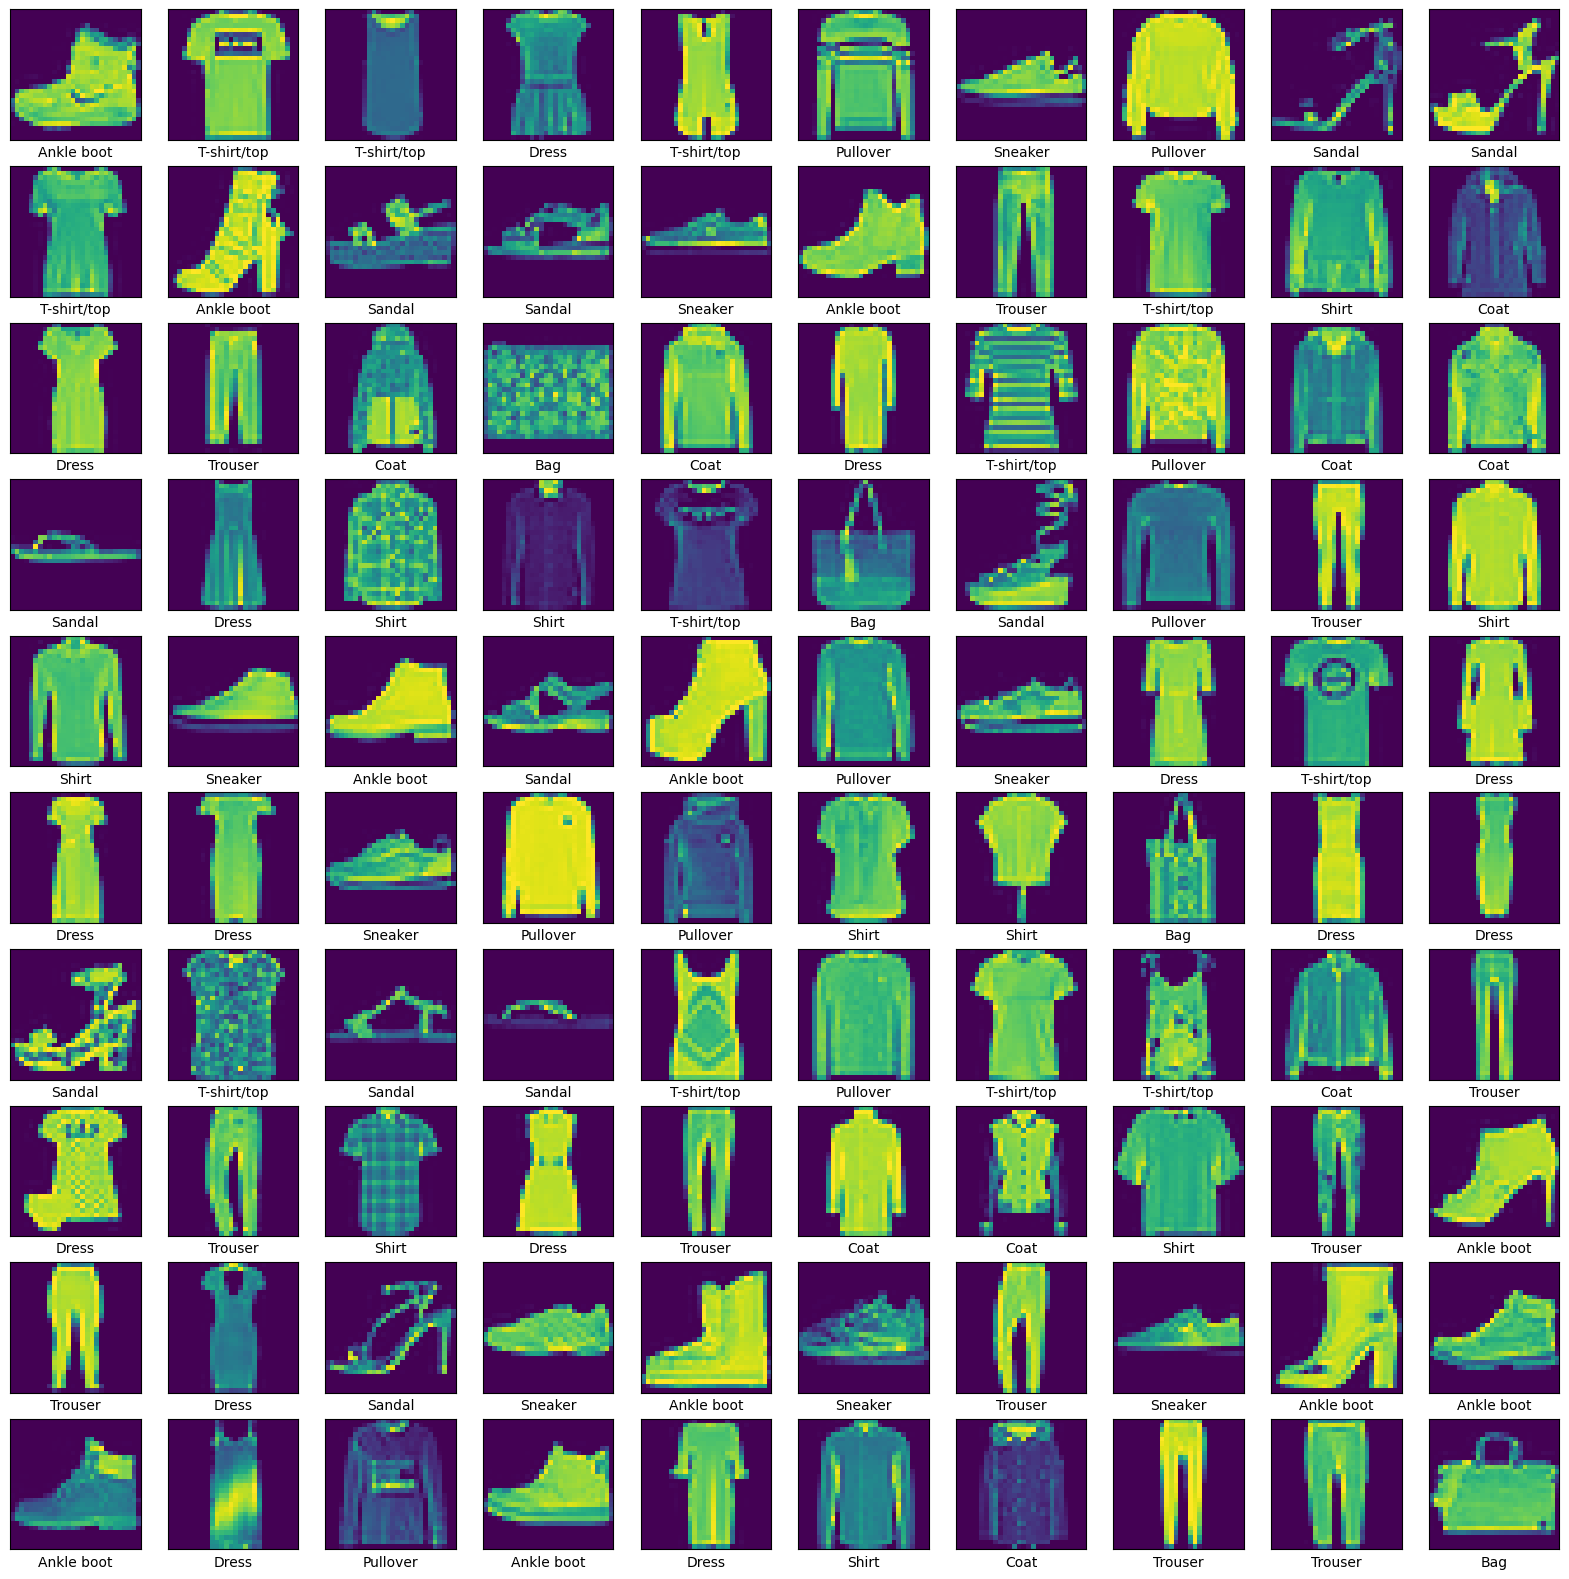

In [24]:
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
model.fit(train_images, train_labels, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2301 - accuracy: 0.9145
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2252 - accuracy: 0.9163
Epoch 3/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2177 - accuracy: 0.9190
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2117 - accuracy: 0.9207
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2046 - accuracy: 0.9230
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2032 - accuracy: 0.9235
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1944 - accuracy: 0.9272
Epoch 8/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1891 - accuracy: 0.9284
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1844 - accuracy: 0.9299
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.179

In [29]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.5485 - accuracy: 0.8942 - 437ms/epoch - 1ms/step

Test accuracy: 0.8942000269889832


In [30]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [31]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [32]:
predictions[1]

array([1.3271770e-08, 8.8974788e-23, 9.9999243e-01, 8.2476445e-16,
       7.0794426e-06, 4.1970979e-18, 5.2121669e-07, 1.7123470e-37,
       6.2005780e-22, 2.5214964e-26], dtype=float32)

In [35]:
np.argmax(predictions[1])


2

In [36]:
test_labels[1]

2

In [37]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

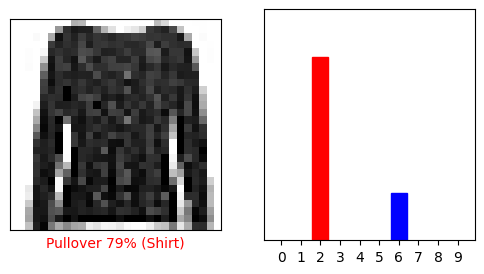

In [45]:
i = 89
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

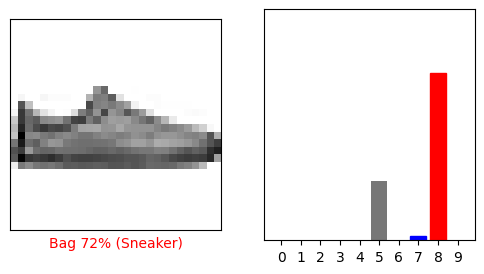

In [46]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

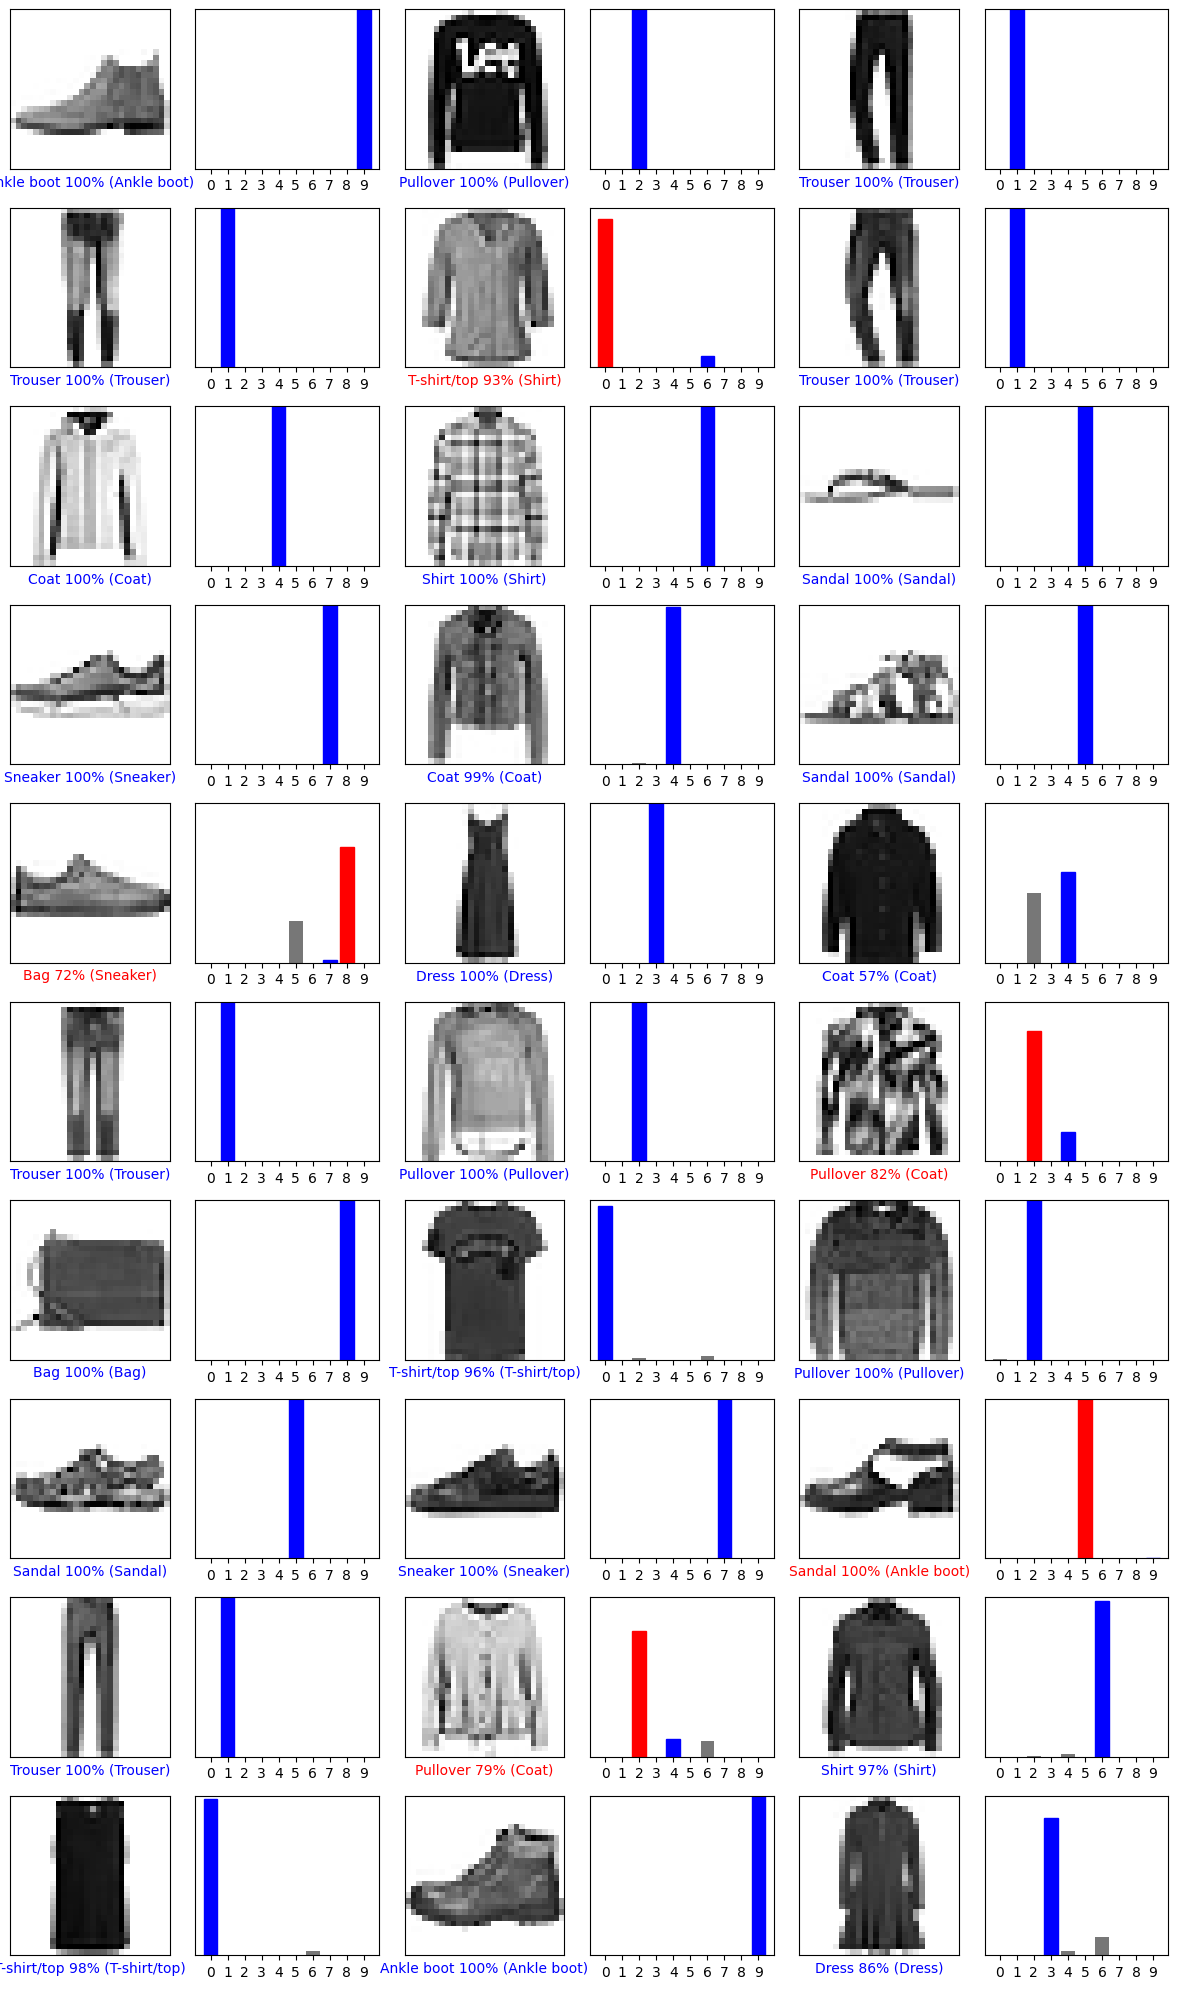

In [48]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [54]:

img = test_images[7]

print(img.shape)

(28, 28)


In [55]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [56]:
predictions_single = probability_model.predict(img)

print(predictions_single
      )

1/1 [==============================] - 0s 16ms/step
[[7.4488718e-16 2.1799193e-23 9.5330665e-07 5.1778498e-13 5.3587773e-05
  3.2490357e-16 9.9994540e-01 1.1496350e-31 5.9055371e-20 5.4265431e-22]]


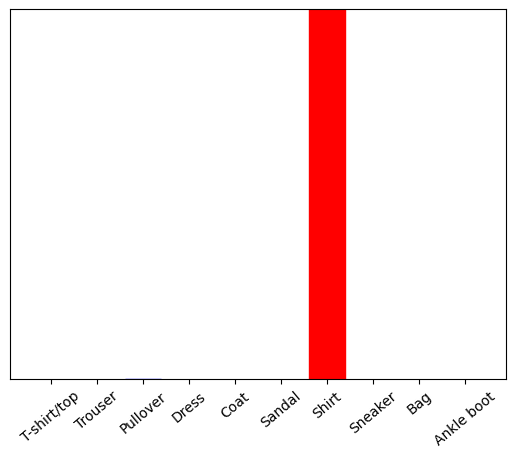

In [57]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=40)
plt.show()